# kMeans Method

My implementation of a simple kMeans method.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from random import randrange
from matplotlib import style
style.use('ggplot')
import copy
from scipy.spatial import distance

In [2]:
class K_Means:
    def __init__(self, k=2, tol=0.001, max_iter=1000):
        self.k = k                 # Number of clusters
        self.tol = tol             # Stopping criterion
        self.max_iter = max_iter   # Maximum iterations

    # Function to find de centroids of each cluster
    def fit(self, X):
        centroids = []
        for _ in range(self.k):
            centroid = randrange(X.shape[0])
            while centroid in centroids:
                centroid = randrange(X.shape[0])    
            centroids.append(centroid)
        self.centroids = X[centroids, :]
        for i in range(self.max_iter):
            self.classifications = np.zeros(X.shape[0])  
            j = 0
            for featureset in X:
                distances = [np.linalg.norm(featureset-self.centroids[k]) for k in range(self.k)]
                classification = distances.index(min(distances))
                self.classifications[j] = classification
                j += 1
            prev_centroids = copy.deepcopy(self.centroids)
            
            for c in range(self.k):
                self.centroids[c] = np.average(X[self.classifications==c], axis=0)
            optimized = 0
            for c in range(self.k):
                if distance.euclidean(self.centroids[c], prev_centroids[c])/np.linalg.norm(prev_centroids[c])*100.0 < self.tol:
                    optimized += 1
            if optimized>=self.k:
                break
        print(f"iterations: {i+1}")
    
    # Function to assign a cluster to each sample 
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

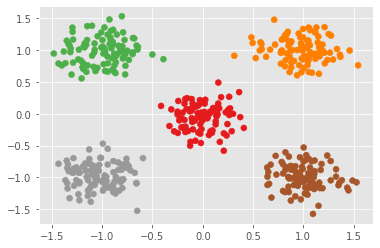

In [3]:
from sklearn.datasets import make_blobs
# centers of the blobs
centers = [(0,0), (-1,1), (1,1), (1,-1), (-1,-1)]

# create the sample
X, y = make_blobs(n_samples=500, n_features=2, cluster_std=0.2, centers=centers, shuffle=False)
y[np.where(y==4)] = 5
y[np.where(y==3)] = 4
y[np.where(y==2)] = 3
y[np.where(y==1)] = 2
y[np.where(y==0)] = 1
plt.scatter(X[:,0], X[:,1], c=y-1, cmap="Set1")

iterations: 12


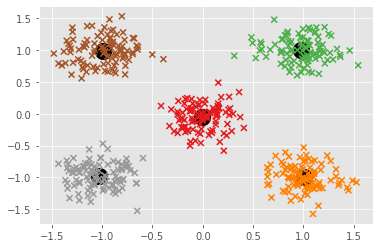

In [4]:
model = K_Means(k=5, tol=0.0001, max_iter=100)
model.fit(X)
for centroid in model.centroids:
    plt.scatter(centroid[0], centroid[1],
                marker="o", color="k", s=150, linewidths=5)
plt.scatter(X[:,0], X[:,1], marker="x", c=model.classifications, cmap="Set1")
plt.show()